In [5]:
import pyiron_workflow_atomistics

# Example for ASE engine with MACE calculator
from pyiron_workflow_atomistics.engine_ase.ase import ASEEngine
from ase.optimize import BFGS
from ase.build import bulk
from mace.calculators import MACECalculator
from pyiron_workflow_atomistics.bulk import optimise_cubic_lattice_parameter
from pyiron_workflow import Workflow
from pyiron_workflow_atomistics.dataclass_storage import CalcInputMinimize

pyiron_workflow_atomistics.__file__
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
calculator = MACECalculator(model_path='mace-omat-0-small.model', device='cpu')

inp = CalcInputMinimize()
inp.relax_cell = False
inp.force_convergence_tolerance = 0.01
# Create structure
structure = bulk("Fe", a=2.88, cubic=True)

# Create ASE Engine with MACE calculator
Engine = ASEEngine(
    EngineInput=inp,
    calculator=calculator,  # Using the MACE calculator
)
Engine.working_directory = "test_opt_cubic_cell_ase"
Engine.optimizer_class = BFGS  # Use BFGS optimizer for minimization
Engine.write_to_disk = True
# Create workflow and optimize cubic lattice parameter
wf1 = Workflow(Engine.working_directory, delete_existing_savefiles=True)
wf1.opt_cubic_cell = optimise_cubic_lattice_parameter(
    structure=structure,
    name="Fe",
    crystalstructure="bcc",
    calculation_engine=Engine,
    parent_working_directory="opt_cubic_cell_ase",
    rattle=0.1,
    strain_range=(-0.02, 0.02),
    num_points=11,
    eos_type="birchmurnaghan",
)
# Any eos_type supported by ase.eos.EquationOfState can be used,
# e.g. sjeos, taylor, murnaghan, birch, birchmurnaghan, pouriertarantola, vinet, antonschmidt, p3

wf1.run()


/home/liger/miniconda3/envs/pyiron_workflow_atomistics/lib/python3.12/site-packages/mace/calculators/mace.py:197: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)
INFO:pyiron_log:Assigning a channel with the label structure to the io key opt_cubic_cell__structure
INFO:pyiron_log:Assigning a channel with the label name to the io key opt_cubic_cell__name
INFO:pyiron_log:Assigning a channel with the label crystalstructure to the io key opt_cubic_cell__crystalstructure
INFO:pyiron_log:Assigning a channel with the label calculation_engine to the io key opt_cubic_cell__calculation_engine
INFO:pyiron_log:Assigning a channel with the label calc_structure_fn to the io key opt_cubic_cell__calc_structure_fn
INFO:pyiron_log:Assigning a channel with the label calc_structure_fn_kwargs to the io key opt_cubic_cell__calc_str

Using head omat_pbe out of ['omat_pbe']
No dtype selected, switching to float64 to match model dtype.


INFO:pyiron_log:Assigning a channel with the label parent_working_directory to the io key opt_cubic_cell__parent_working_directory
INFO:pyiron_log:Assigning a channel with the label eos_type to the io key opt_cubic_cell__eos_type
INFO:pyiron_log:Assigning a channel with the label structure to the io key opt_cubic_cell__structure
INFO:pyiron_log:Assigning a channel with the label name to the io key opt_cubic_cell__name
INFO:pyiron_log:Assigning a channel with the label crystalstructure to the io key opt_cubic_cell__crystalstructure
INFO:pyiron_log:Assigning a channel with the label calculation_engine to the io key opt_cubic_cell__calculation_engine
INFO:pyiron_log:Assigning a channel with the label calc_structure_fn to the io key opt_cubic_cell__calc_structure_fn
INFO:pyiron_log:Assigning a channel with the label calc_structure_fn_kwargs to the io key opt_cubic_cell__calc_structure_fn_kwargs
INFO:pyiron_log:Assigning a channel with the label rattle to the io key opt_cubic_cell__rattle
I

      Step     Time          Energy          fmax
BFGS:    0 23:14:32      -16.430046        1.054009
BFGS:    1 23:14:33      -16.458285        0.820722
BFGS:    2 23:14:33      -16.500666        0.025230
BFGS:    3 23:14:34      -16.500706        0.001158
      Step     Time          Energy          fmax
BFGS:    0 23:14:34      -16.444291        1.049382
BFGS:    1 23:14:35      -16.472316        0.819309
BFGS:    2 23:14:35      -16.514909        0.026230
BFGS:    3 23:14:36      -16.514952        0.001141
      Step     Time          Energy          fmax
BFGS:    0 23:14:36      -16.456172        1.043372
BFGS:    1 23:14:37      -16.483914        0.817092
BFGS:    2 23:14:38      -16.526692        0.027275
BFGS:    3 23:14:38      -16.526739        0.001118
      Step     Time          Energy          fmax
BFGS:    0 23:14:39      -16.465307        1.035810
BFGS:    1 23:14:39      -16.492689        0.813972
BFGS:    2 23:14:40      -16.535623        0.028436
BFGS:    3 23:14:40 

INFO:pyiron_log:Assigning a channel with the label equil_struct to the io key opt_cubic_cell__equil_struct
INFO:pyiron_log:Assigning a channel with the label a0 to the io key opt_cubic_cell__a0
INFO:pyiron_log:Assigning a channel with the label B to the io key opt_cubic_cell__B
INFO:pyiron_log:Assigning a channel with the label equil_energy_per_atom to the io key opt_cubic_cell__equil_energy_per_atom
INFO:pyiron_log:Assigning a channel with the label equil_volume_per_atom to the io key opt_cubic_cell__equil_volume_per_atom
INFO:pyiron_log:Assigning a channel with the label volumes to the io key opt_cubic_cell__volumes
INFO:pyiron_log:Assigning a channel with the label structures to the io key opt_cubic_cell__structures
INFO:pyiron_log:Assigning a channel with the label energies to the io key opt_cubic_cell__energies


{'opt_cubic_cell__equil_struct': Atoms(symbols='Fe2', pbc=True, cell=[2.881888444511809, 2.881888444511809, 2.881888444511809], initial_magmoms=...),
 'opt_cubic_cell__a0': 2.881888444511809,
 'opt_cubic_cell__B': 168.68969093076927,
 'opt_cubic_cell__equil_energy_per_atom': -8.271901641825991,
 'opt_cubic_cell__equil_volume_per_atom': 11.967446680687386,
 'opt_cubic_cell__volumes': [22.483074023424,
  22.759502184972295,
  23.03818689046118,
  23.319137312833536,
  23.602362625032185,
  23.887872,
  24.17567461067981,
  24.46577963001446,
  24.758196230946815,
  25.0529335864197,
  25.350000869376007],
 'opt_cubic_cell__structures': [Atoms(symbols='Fe2', pbc=True, cell=[2.8224, 2.8224, 2.8224], forces=..., initial_magmoms=...),
  Atoms(symbols='Fe2', pbc=True, cell=[2.83392, 2.83392, 2.83392], forces=..., initial_magmoms=...),
  Atoms(symbols='Fe2', pbc=True, cell=[2.84544, 2.84544, 2.84544], forces=..., initial_magmoms=...),
  Atoms(symbols='Fe2', pbc=True, cell=[2.85696, 2.85696, 2.

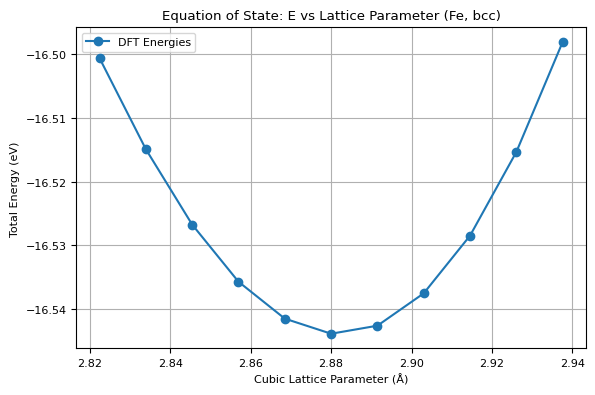

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the relevant results from the workflow
opt_structures = wf1.opt_cubic_cell.outputs.to_value_dict()["structures"]
opt_energies = wf1.opt_cubic_cell.outputs.to_value_dict()["energies"]

# Compute the lattice parameter (assuming cubic, so just a[0,0])
lattice_params = [atoms.cell[0, 0] for atoms in opt_structures]

plt.figure(figsize=(6, 4))
plt.plot(lattice_params, opt_energies, 'o-', label='DFT Energies')
plt.xlabel('Cubic Lattice Parameter (Å)')
plt.ylabel('Total Energy (eV)')
plt.title('Equation of State: E vs Lattice Parameter (Fe, bcc)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
